In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef,
                             confusion_matrix, classification_report)

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')


In [36]:
# Install dependencies as needed:
# pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the specific file (not a directory)
file_path = "mushrooms.csv"

# Load the dataset
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/mushroom-classification",
  file_path
)

## Dataset Attribute Information

### Classes
- **edible** = e
- **poisonous** = p

### Attribute Descriptions

| Attribute | Values |
|-----------|--------|
| **cap-shape** | bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s |
| **cap-surface** | fibrous=f, grooves=g, scaly=y, smooth=s |
| **cap-color** | brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y |
| **bruises** | bruises=t, no=f |
| **odor** | almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s |
| **gill-attachment** | attached=a, descending=d, free=f, notched=n |
| **gill-spacing** | close=c, crowded=w, distant=d |
| **gill-size** | broad=b, narrow=n |
| **gill-color** | black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y |
| **stalk-shape** | enlarging=e, tapering=t |
| **stalk-root** | bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? |
| **stalk-surface-above-ring** | fibrous=f, scaly=y, silky=k, smooth=s |
| **stalk-surface-below-ring** | fibrous=f, scaly=y, silky=k, smooth=s |
| **stalk-color-above-ring** | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| **stalk-color-below-ring** | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| **veil-type** | partial=p, universal=u |
| **veil-color** | brown=n, orange=o, white=w, yellow=y |
| **ring-number** | none=n, one=o, two=t |
| **ring-type** | cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z |
| **spore-print-color** | black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y |
| **population** | abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y |
| **habitat** | grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d |

In [37]:
print("="*70)
print("MUSHROOM CLASSIFICATION - DATASET OVERVIEW")
print("="*70)
print("\nDataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum().sum(), "missing values")
print(df.isna().sum().sum(), "missing values")
print("\nTarget Distribution:")
print(df['class'].value_counts())
print(f"\nPercentage Distribution:")
print(df['class'].value_counts(normalize=True) * 100)

MUSHROOM CLASSIFICATION - DATASET OVERVIEW

Dataset Shape: (8124, 23)

First few rows:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-co

In [38]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [39]:
print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Convert target to binary (0: edible, 1: poisonous)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
print(f"\nTarget encoding: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

# Label encode all categorical features
label_encoders = {}
X_encoded = X.copy()

for column in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    label_encoders[column] = le

print(f"\nNumber of Features after encoding: {X_encoded.shape[1]}")
print(f"Number of Instances: {X_encoded.shape[0]}")
print("\nFeatures:", list(X_encoded.columns))


DATA PREPROCESSING

Target encoding: {'e': np.int64(0), 'p': np.int64(1)}

Number of Features after encoding: 22
Number of Instances: 8124

Features: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Number of Features after encoding: 22
Number of Instances: 8124

Features: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set distribution: {np.bincount(y_train)}")
print(f"Test set distribution: {np.bincount(y_test)}")


Training set size: 6499
Test set size: 1625
Training set distribution: [3366 3133]
Test set distribution: [842 783]


In [41]:
def evaluate_model(model, X_test, y_test, model_name):
    """Calculate all required metrics for a model"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred_proba),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1': f1_score(y_test, y_pred, zero_division=0),
        'MCC': matthews_corrcoef(y_test, y_pred)
    }
    
    return metrics, y_pred

In [42]:
results = []

In [43]:
# ----------------------------
# MODEL 1: Logistic Regression
# ----------------------------
print("\n1. Logistic Regression")
lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
lr_model.fit(X_train, y_train)
lr_metrics, lr_pred = evaluate_model(lr_model, X_test, y_test, 'Logistic Regression')
results.append(lr_metrics)
print(f"   Accuracy: {lr_metrics['Accuracy']:.4f}")
print(f"   AUC: {lr_metrics['AUC']:.4f}")
print(f"   F1 Score: {lr_metrics['F1']:.4f}")


1. Logistic Regression
   Accuracy: 0.9551
   AUC: 0.9822
   F1 Score: 0.9531
   Accuracy: 0.9551
   AUC: 0.9822
   F1 Score: 0.9531


In [44]:
# ----------------------------
# MODEL 2: Decision Tree
# ----------------------------
print("\n2. Decision Tree Classifier")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10)
dt_model.fit(X_train, y_train)
dt_metrics, dt_pred = evaluate_model(dt_model, X_test, y_test, 'Decision Tree')
results.append(dt_metrics)
print(f"   Accuracy: {dt_metrics['Accuracy']:.4f}")
print(f"   AUC: {dt_metrics['AUC']:.4f}")
print(f"   F1 Score: {dt_metrics['F1']:.4f}")


2. Decision Tree Classifier
   Accuracy: 1.0000
   AUC: 1.0000
   F1 Score: 1.0000


In [45]:
# ----------------------------
# MODEL 3: K-Nearest Neighbors
# ----------------------------
print("\n3. K-Nearest Neighbors Classifier")
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train, y_train)
knn_metrics, knn_pred = evaluate_model(knn_model, X_test, y_test, 'K-Nearest Neighbors')
results.append(knn_metrics)
print(f"   Accuracy: {knn_metrics['Accuracy']:.4f}")
print(f"   AUC: {knn_metrics['AUC']:.4f}")
print(f"   F1 Score: {knn_metrics['F1']:.4f}")


3. K-Nearest Neighbors Classifier
   Accuracy: 0.9975
   AUC: 1.0000
   F1 Score: 0.9975
   Accuracy: 0.9975
   AUC: 1.0000
   F1 Score: 0.9975


In [46]:
# ----------------------------
# MODEL 4: Naive Bayes
# ----------------------------
print("\n4. Naive Bayes Classifier (Gaussian)")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_metrics, nb_pred = evaluate_model(nb_model, X_test, y_test, 'Naive Bayes')
results.append(nb_metrics)
print(f"   Accuracy: {nb_metrics['Accuracy']:.4f}")
print(f"   AUC: {nb_metrics['AUC']:.4f}")
print(f"   F1 Score: {nb_metrics['F1']:.4f}")


4. Naive Bayes Classifier (Gaussian)
   Accuracy: 0.9286
   AUC: 0.9506
   F1 Score: 0.9265


In [47]:
# ----------------------------
# MODEL 5: Random Forest
# ----------------------------
print("\n5. Random Forest (Ensemble)")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_metrics, rf_pred = evaluate_model(rf_model, X_test, y_test, 'Random Forest')
results.append(rf_metrics)
print(f"   Accuracy: {rf_metrics['Accuracy']:.4f}")
print(f"   AUC: {rf_metrics['AUC']:.4f}")
print(f"   F1 Score: {rf_metrics['F1']:.4f}")


5. Random Forest (Ensemble)
   Accuracy: 1.0000
   AUC: 1.0000
   F1 Score: 1.0000
   Accuracy: 1.0000
   AUC: 1.0000
   F1 Score: 1.0000


In [48]:
# ----------------------------
# MODEL 6: XGBoost
# ----------------------------
print("\n6. XGBoost (Ensemble)")
xgb_model = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, 
                          max_depth=5, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_metrics, xgb_pred = evaluate_model(xgb_model, X_test, y_test, 'XGBoost')
results.append(xgb_metrics)
print(f"   Accuracy: {xgb_metrics['Accuracy']:.4f}")
print(f"   AUC: {xgb_metrics['AUC']:.4f}")
print(f"   F1 Score: {xgb_metrics['F1']:.4f}")


6. XGBoost (Ensemble)
   Accuracy: 1.0000
   AUC: 1.0000
   F1 Score: 1.0000


In [49]:
results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("MODEL COMPARISON TABLE")
print("="*70)
print(results_df.to_string(index=False))

# Save results to CSV
results_df.to_csv('model_comparison_results.csv', index=False)
print("\n✓ Results saved to 'model_comparison_results.csv'")


MODEL COMPARISON TABLE
              Model  Accuracy      AUC  Precision   Recall       F1      MCC
Logistic Regression  0.955077 0.982187   0.959845 0.946360 0.953055 0.910075
      Decision Tree  1.000000 1.000000   1.000000 1.000000 1.000000 1.000000
K-Nearest Neighbors  0.997538 0.999994   0.994917 1.000000 0.997452 0.995083
        Naive Bayes  0.928615 0.950566   0.919497 0.933589 0.926489 0.857213
      Random Forest  1.000000 1.000000   1.000000 1.000000 1.000000 1.000000
            XGBoost  1.000000 1.000000   1.000000 1.000000 1.000000 1.000000

✓ Results saved to 'model_comparison_results.csv'


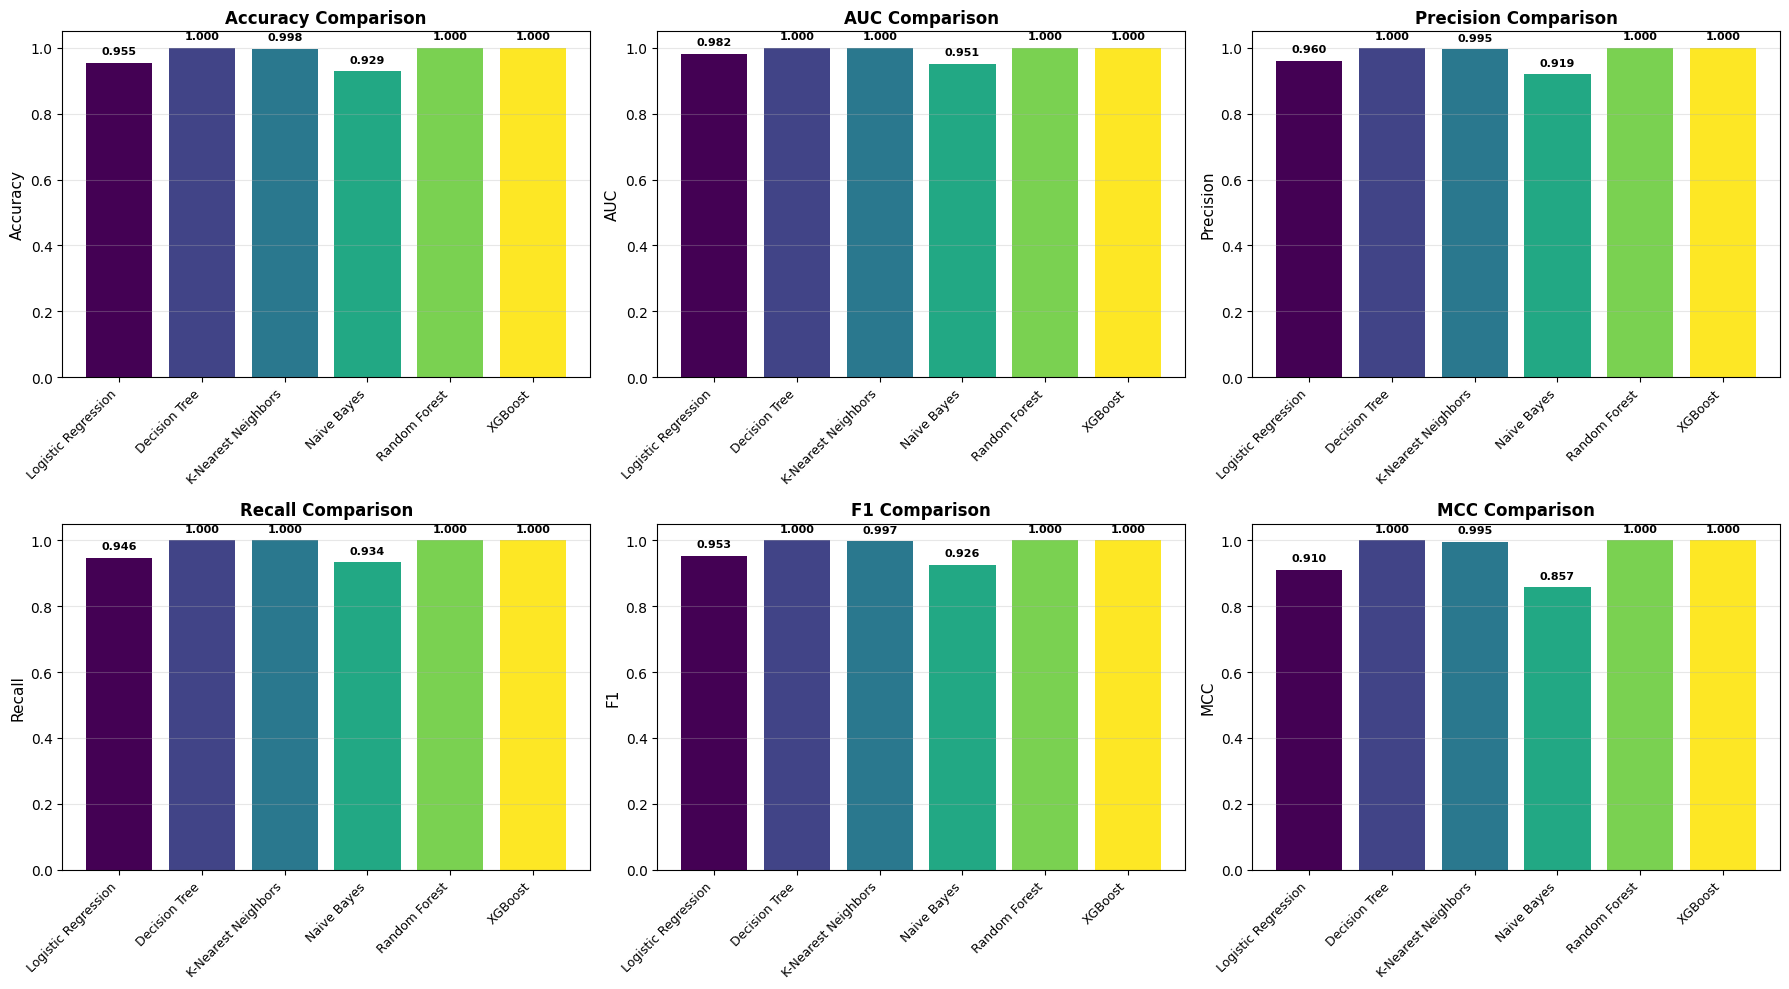

✓ Visualization saved as 'model_comparison.png'


In [50]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics_to_plot = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']

for idx, metric in enumerate(metrics_to_plot):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    values = results_df[metric].values
    models = results_df['Model'].values
    
    bars = ax.bar(range(len(models)), values, color=plt.cm.viridis(np.linspace(0, 1, len(models))))
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
    ax.set_ylabel(metric, fontsize=11)
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylim([0, 1.05])
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, values)):
        ax.text(bar.get_x() + bar.get_width()/2, val + 0.02, 
                f'{val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'model_comparison.png'")

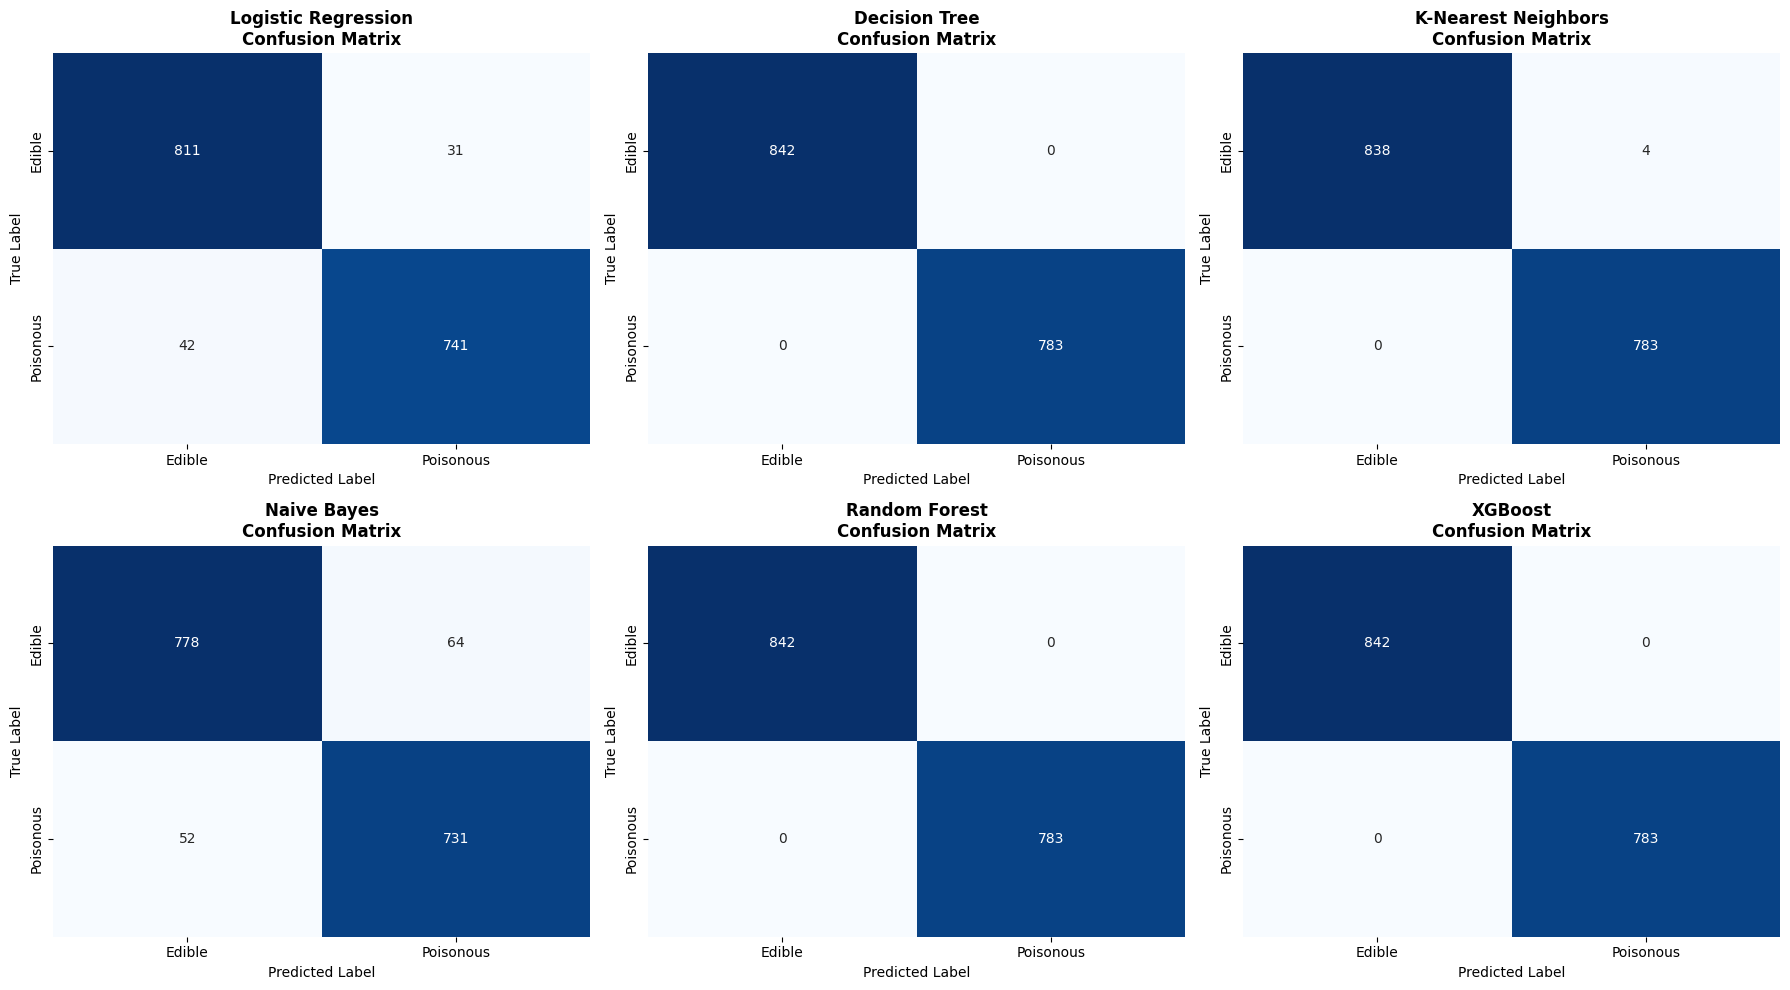

✓ Confusion matrices saved as 'confusion_matrices.png'


In [51]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
predictions = [lr_pred, dt_pred, knn_pred, nb_pred, rf_pred, xgb_pred]
model_names = results_df['Model'].values

for idx, (pred, name) in enumerate(zip(predictions, model_names)):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                xticklabels=['Edible', 'Poisonous'],
                yticklabels=['Edible', 'Poisonous'])
    ax.set_title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=10)
    ax.set_xlabel('Predicted Label', fontsize=10)

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices saved as 'confusion_matrices.png'")